### MATH 3375 Project 4 - Logistic Regression

For this project, we will use a data set with several features of individual e-mails to predict whether the e-mail should be classified as 'spam'. The data set was obtained from the Machine Learning Repository at UC Irvine. 

Below is documentation related to the data set. 

    | SPAM E-MAIL DATABASE ATTRIBUTES 
    |
    | 48 continuous real [0,100] attributes of type word_freq_WORD 
    | = percentage of words in the e-mail that match WORD,
    | i.e. 100 * (number of times the WORD appears in the e-mail) / 
    | (total number of words in e-mail).  A "word" in this case is any 
    | string of alphanumeric characters bounded by non-alphanumeric 
    | characters or end-of-string.
    | Example: word_freq_credit indicates the percentage of words 
    |          in the email that are 'credit'
    |
    | 6 continuous real [0,100] attributes of type char_freq_#
    | = percentage of characters in the e-mail that match a specific 
    | character, given by the table below:

|feature|character description|character|
|-------|---------------------|:---------:|
| char_freq_1| semicolon |**;**|            
| char_freq_2| left parenthesis |(|      
| char_freq_3| left bracket |$[$|
| char_freq_4| exclamation mark|**!**| 
| char_freq_5| dollar sign |$|
| char_freq_6| hashtag/pound sign |#|


    | i.e. 100 * (number of CHAR occurences)/(total characters in e-mail)
    | Example: char_freq_4 indicates the percentage of characters 
    |          in the email that are an exclamation mark
    |
    | 1 continuous real [1,...] attribute: capital_run_length_average
    | = average length of uninterrupted sequences of capital letters
    |
    | 1 continuous integer [1,...] attribute: capital_run_length_longest
    | = length of longest uninterrupted sequence of capital letters
    |
    | 1 continuous integer [1,...] attribute: capital_run_length_total
    | = sum of length of uninterrupted sequences of capital letters
    | = total number of capital letters in the e-mail
    |
    | 1 nominal {0,1} class attribute: is_spam
    | = denotes whether the e-mail was considered spam (1) or not (0), 
    | i.e. unsolicited commercial e-mail.  
    |
    | For more information, see file 'spambase.DOCUMENTATION' at the
    | UCI Machine Learning Repository: http://www.ics.uci.edu/~mlearn/MLRepository.html






In [2]:
spam_data <- read.csv("spambase.csv")
head(spam_data)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,⋯,char_freq_1,char_freq_2,char_freq_3,char_freq_4,char_freq_5,char_freq_6,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
3,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1
6,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,1


## Tasks

### Exploratory Data Analysis

##### 1. Use code to find the answers to the following questions.

**Type your answers in this cell.**  

_For an answer to receive credit, the code cell(s) below must have supporting code to show how your answers were obtained._

* How many rows are in the data set?
    <br>Answer:  4601
    
    
* OTHER than the response variable, how many features (columns) are in the data set?
    <br>Answer: 57
    
    
* What proportion of the data points in the data set are classified as spam?
    <br>Answer: 0.3940448
    
    
* Does the word 'money' show up more frequently in spam e-mails than non-spam emails? (_HINT: Use a plot to visualize this_.)
    <br>Answer: shows up more in spam
    

[1] 4601
[1] 57
[1] 0.3940448


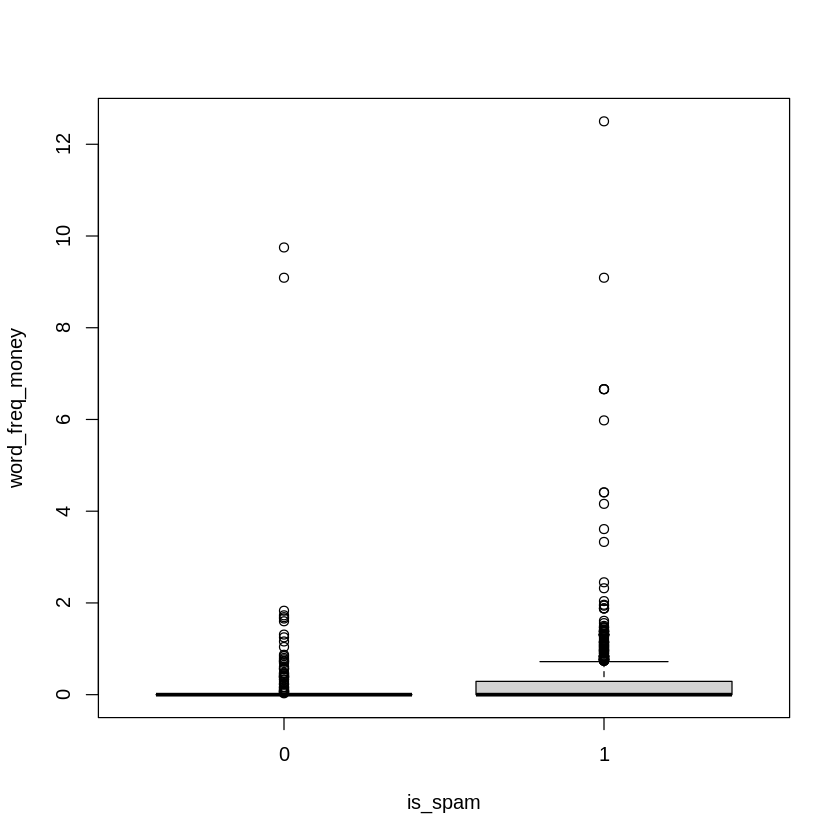

In [14]:
#Put code for Exercise 1 in this cell. You may add additional cells if you like.
num_rows <- nrow(spam_data)
print(num_rows)

num_columns <- ncol(spam_data) - 1  
print(num_columns)

proportion_spam <- mean(spam_data$is_spam)
print(proportion_spam)


boxplot(word_freq_money ~ is_spam, data = spam_data)

### Partitioning Data

##### 2. Partition the data set into training and test sets.

Partition the data set into a training set (80% of the data) and a test set (20% of the data).  Note that you should train your model(s) _**using ONLY the training data**.  We are saving the test data set to evaluate performance of the models._

In [4]:
#Put code for Exercise 2 in this cell. You may add additional cells if you like.
nrow(spam_data)
spam_idx <- 1:nrow(spam_data)

set.seed(3375)

train_rows <- sort(sample(spam_idx, 3680.8))
train_rows



[1] 4601

[1]    1    2    3    4    5    7    8    9   10   11   12   13   14   15
  [15]   16   17   18   19   20   21   22   23   24   25   26   27   29   30
  [29]   31   32   33   34   35   38   39   40   42   44   45   46   47   49
  [43]   51   52   53   54   55   56   58   59   60   61   62   63   65   66
  [57]   68   69   71   75   76   77   80   81   83   84   85   86   87   88
  [71]   89   90   91   92   93   94   95   96   97   98   99  100  101  102
  [85]  104  105  106  108  109  110  111  112  113  115  117  118  119  120
  [99]  121  122  124  125  126  127  128  129  130  131  132  133  134  135
 [113]  136  137  138  139  140  142  143  144  145  146  147  150  152  154
 [127]  155  156  157  159  160  162  163  166  167  168  169  170  171  174
 [141]  175  176  177  178  179  180  182  183  184  185  186  187  188  189
 [155]  190  191  192  193  194  195  198  199  200  201  202  203  204  206
 [169]  207  208  210  211  212  213  214  215  216  219  220  221  223  224
 [183]  225  226  227  228  229  230  231  233  234  235  236  237  238  239
 [197]  240  242  243  244  246  247  248  249  251  252  253  254  255  256
 [211]  257  258  259  260  261  262  263  264  265  266  267  268  270  271
 [225]  272  273  275  276  277  278  279  280  281  282  283  284  285  287
 [239]  288  289  290  291  294  295  298  299  301  302  303  305  306  307
 [253]  308  310  312  313  314  315  316  317  318  319  320  321  322  323
 [267]  324  325  327  328  329  330  331  332  333  335  336  337  338  341
 [281]  342  344  345  347  349  350  351  352  354  355  357  358  360  361
 [295]  363  364  366  367  368  369  370  371  372  373  374  375  376  377
 [309]  379  380  381  382  384  385  386  388  389  390  391  392  393  396
 [323]  397  398  399  400  401  402  403  405  407  408  409  410  411  413
 [337]  414  415  417  418  419  420  421  422  423  425  426  427  429  430
 [351]  431  434  435  436  437  438  439  440  442  444  445  446  447  450
 [365]  451  452  453  455  456  458  459  460  461  462  463  464  466  468
 [379]  469  470  474  475  477  478  479  480  481  482  485  486  487  488
 [393]  489  490  491  492  493  494  495  496  497  498  499  500  501  502
 [407]  503  504  505  507  508  509  510  511  513  514  516  517  518  519
 [421]  520  521  523  524  525  526  527  528  529  530  531  534  536  537
 [435]  539  540  541  542  543  545  546  547  548  549  550  551  553  555
 [449]  557  558  559  560  561  562  563  564  565  566  567  568  569  570
 [463]  571  572  573  574  575  576  577  578  579  580  581  582  583  587
 [477]  588  589  590  591  592  593  594  596  599  600  601  602  603  605
 [491]  606  607  611  612  613  614  615  616  617  618  620  621  623  625
 [505]  626  627  628  629  630  631  633  635  636  637  638  640  642  643
 [519]  644  646  647  649  650  651  653  654  655  656  657  658  659  660
 [533]  661  662  663  664  665  666  667  668  669  670  671  672  673  674
 [547]  675  676  677  678  679  681  682  683  684  686  688  689  690  691
 [561]  692  693  694  695  698  699  700  702  703  705  706  707  710  711
 [575]  714  715  716  717  718  719  720  721  722  723  724  725  726  727
 [589]  728  731  732  733  734  735  736  738  739  740  741  744  745  746
 [603]  747  748  749  752  755  756  757  758  759  760  761  762  764  765
 [617]  768  769  770  771  772  775  776  778  780  781  782  783  784  785
 [631]  786  788  789  790  791  792  793  795  796  797  798  800  801  802
 [645]  803  805  807  808  809  810  811  813  814  815  816  817  818  820
 [659]  821  823  824  825  826  827  828  830  831  833  836  838  839  840
 [673]  843  845  846  847  848  849  850  851  852  853  854  855  856  857
 [687]  858  859  860  861  862  863  864  865  867  869  870  871  872  873
 [701]  874  875  877  878  879  880  881  882  883  884  885  886  888  890
 [715]  891  892  894  895  896  897  898  899  901  902  903  904  906  908

### Create a Model

##### 3. Create a Logistic Regression Model with Five Predictors

Create a Logistic Regression model to predict whether a model is spam. The model should meet the following guidelines:

* The model should use only FIVE of the features in the data set as predictors
* At least TWO of the features should be from the set of **word_freq_xxxx** features
* At least ONE of the features should be from the set of **char_freq_x** features
* At least ONE of the features should be from the set of **capital_run_length_xxxx** features

Beyond the guidelines above, the choice of predictors is up to you.  Show your model summary after you have created the model.

In [5]:
#Put solution to Exercise 3 in this cell. You may add additional cells if you like.

model <- glm(is_spam ~ word_freq_make + word_freq_address + char_freq_1 + capital_run_length_average + 
             capital_run_length_longest, 
             data = spam_data, family = "binomial")

summary(model)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = is_spam ~ word_freq_make + word_freq_address + 
    char_freq_1 + capital_run_length_average + capital_run_length_longest, 
    family = "binomial", data = spam_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.8061  -0.6981   1.0318   1.9245  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.461913   0.062915 -23.236  < 2e-16 ***
word_freq_make              0.557201   0.107910   5.164 2.42e-07 ***
word_freq_address          -0.066539   0.035417  -1.879 0.060284 .  
char_freq_1                -1.293889   0.349726  -3.700 0.000216 ***
capital_run_length_average  0.122366   0.023505   5.206 1.93e-07 ***
capital_run_length_longest  0.019664   0.001508  13.042  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6170.2  on 4600  degrees of freedom
Residual deviance: 

### Interpret the Model

##### 3a. Answer the following questions about the model.

(Type your answers in this cell.)

* Which predictors are significant, and at what significance level?
    <br>Answer: word_freq_make is significant at 2.47e-07, char_freq_1 is significant at 0.000216, capital_run_length_average is significant at 1.93e-07, and capital_run_length_longest is significant at 2e-16
    
    
* Use the model coefficients in your summary to complete the following equation for using the model to predict the **_probability_** that an e-mail is spam. Note that the equation is written in LaTex.

$$P(Y=1|x_1,x_2,x_3,x_4,x_5) = $$ $$1/1+exp(-(-1.461913)+ (0.557201*x_1) + (-0.066539*x_2)+(−1.293889*x_3)+0.122366*x_4)+(0.019664*x_5)))$$

### Predictions

##### 4. Generate Probability Predictions

Use your model to generate probability predictions for records **_in the test set_**. Display a few rows showing the predicted probability **_and_** the value of the **is_spam** response variable for each record. (Suggestion: Create a dataframe and then show only the first few rows, NOT the entire dataframe.) 

In [6]:
#Put solution to Exercise 4 in this cell. You may add additional cells if you like.

test_set_ind <- setdiff(spam_idx, train_rows)
test_set <- spam_data[test_set_ind, ]  

model2 <-test_set$predicted_probabilities <- predict(model, newdata = test_set, type = "response")

head(test_set[, c("predicted_probabilities", "is_spam")])


,predicted_probabilities,is_spam
,<dbl>,<int>
6,0.3100583,1
28,0.2877287,1
36,0.2681332,1
37,0.2170003,1
41,0.3908042,1
43,0.2322224,1


##### 5. Explore Classification Thresholds

Test several thresholds for classification, where probability > threshold results in a POSITIVE (spam) classification, and any other probability results in a NEGATIVE (non-spam) classification.  **_Use at least the values 0.3, 0.4, 0.5, 0.6, and 0.7_** as thresholds. You may also use others if you choose. 

For each threhold, you should do the following:

* Generate binary (0/1) predictions for the **_test_** data set.
* Create and display an ROC plot. 
* Display the Area Under the Curve (AUC) value for the plot.

In [7]:
#Put solution to Exercise 5 in this cell. You may add additional cells if you like.
tran_class_0.3 <- as.integer(model2 > 0.3)
df_tran_class0.3 <- data.frame(model2 ,tran_class_0.3, is_spam = test_set$is_spam)
head(df_tran_class0.3)

tran_class_0.4 <- as.integer(model2 > 0.4)
df_tran_class0.4 <- data.frame(model2 ,tran_class_0.4, is_spam = test_set$is_spam)
head(df_tran_class0.4)

tran_class_0.5 <- as.integer(model2 > 0.5)
df_tran_class0.5 <- data.frame(model2 ,tran_class_0.5, is_spam = test_set$is_spam)
head(df_tran_class0.5)

tran_class_0.6 <- as.integer(model2 > 0.6)
df_tran_class0.6 <- data.frame(model2 ,tran_class_0.6, is_spam = test_set$is_spam)
head(df_tran_class0.6)

tran_class_0.7 <- as.integer(model2 > 0.7)
df_tran_class0.7 <- data.frame(model2 ,tran_class_0.7, is_spam = test_set$is_spam)
head(df_tran_class0.7)

,model2,tran_class_0.3,is_spam
,<dbl>,<int>,<int>
1,0.3100583,1,1
2,0.2877287,0,1
3,0.2681332,0,1
4,0.2170003,0,1
5,0.3908042,1,1
6,0.2322224,0,1


,model2,tran_class_0.4,is_spam
,<dbl>,<int>,<int>
1,0.3100583,0,1
2,0.2877287,0,1
3,0.2681332,0,1
4,0.2170003,0,1
5,0.3908042,0,1
6,0.2322224,0,1


,model2,tran_class_0.5,is_spam
,<dbl>,<int>,<int>
1,0.3100583,0,1
2,0.2877287,0,1
3,0.2681332,0,1
4,0.2170003,0,1
5,0.3908042,0,1
6,0.2322224,0,1


,model2,tran_class_0.6,is_spam
,<dbl>,<int>,<int>
1,0.3100583,0,1
2,0.2877287,0,1
3,0.2681332,0,1
4,0.2170003,0,1
5,0.3908042,0,1
6,0.2322224,0,1


,model2,tran_class_0.7,is_spam
,<dbl>,<int>,<int>
1,0.3100583,0,1
2,0.2877287,0,1
3,0.2681332,0,1
4,0.2170003,0,1
5,0.3908042,0,1
6,0.2322224,0,1


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




      Predicted
Actual   0   1
     0 390 165
     1  95 271

      Predicted
Actual   0   1
     0 476  79
     1 161 205

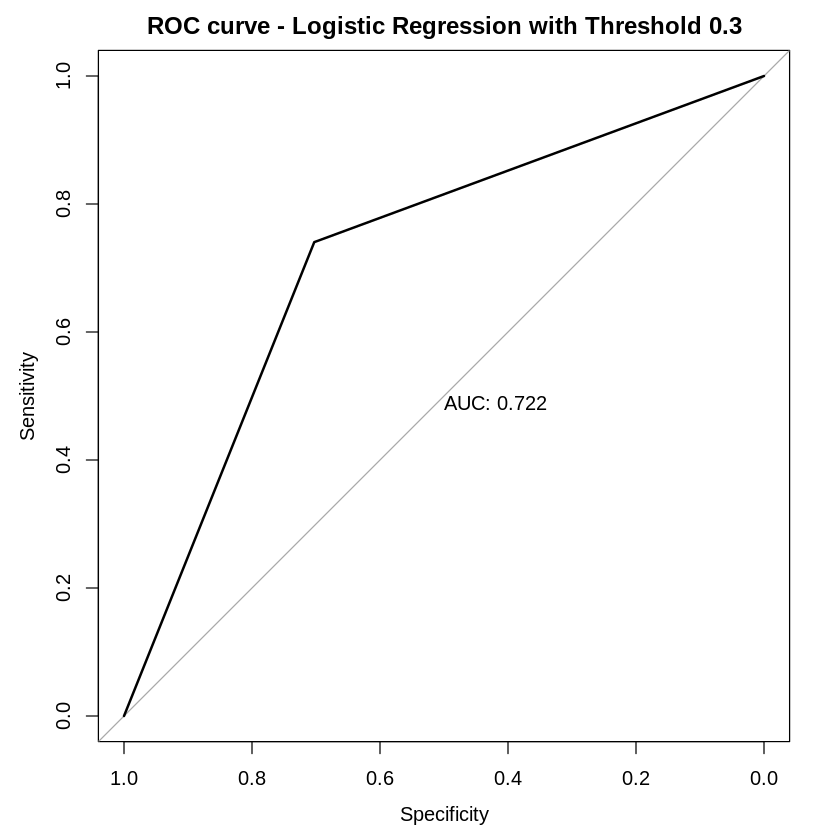

      Predicted
Actual   0   1
     0 513  42
     1 191 175

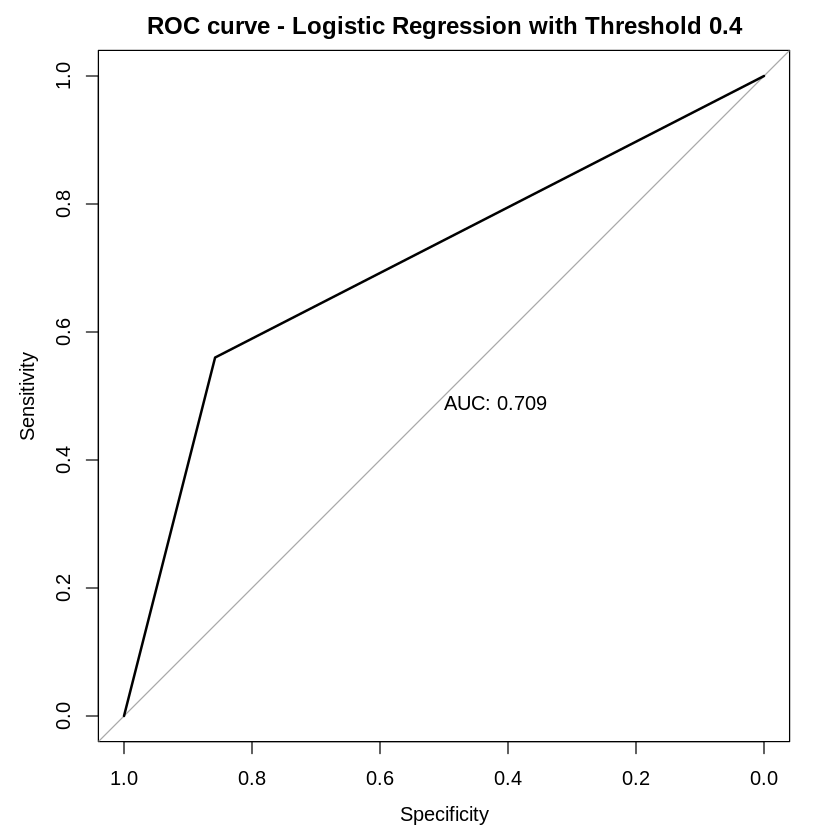

      Predicted
Actual   0   1
     0 528  27
     1 251 115

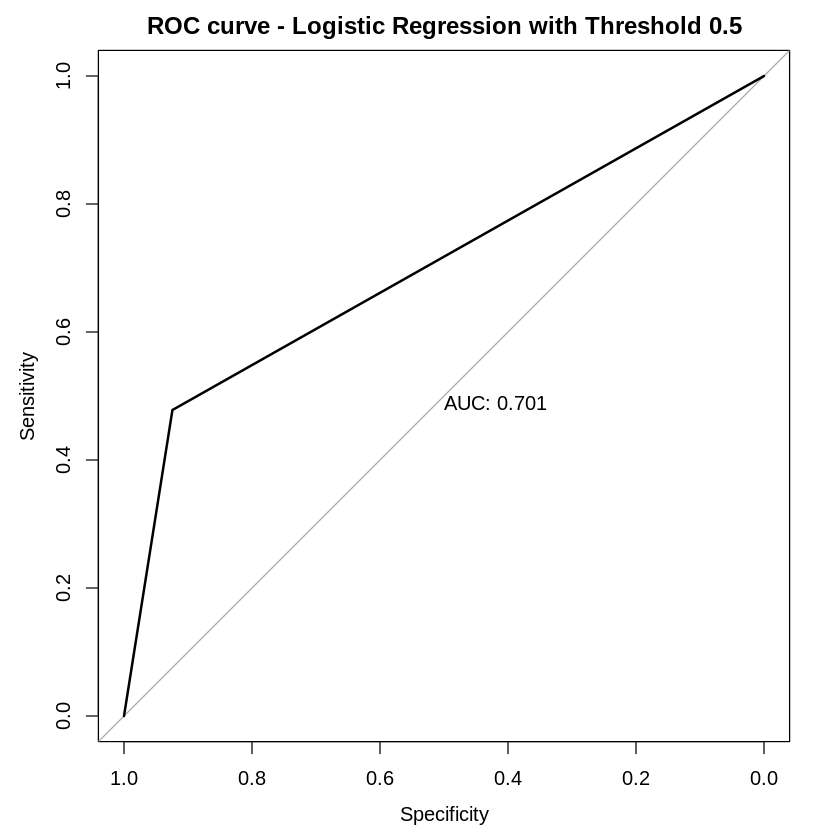

      Predicted
Actual   0   1
     0 538  17
     1 273  93

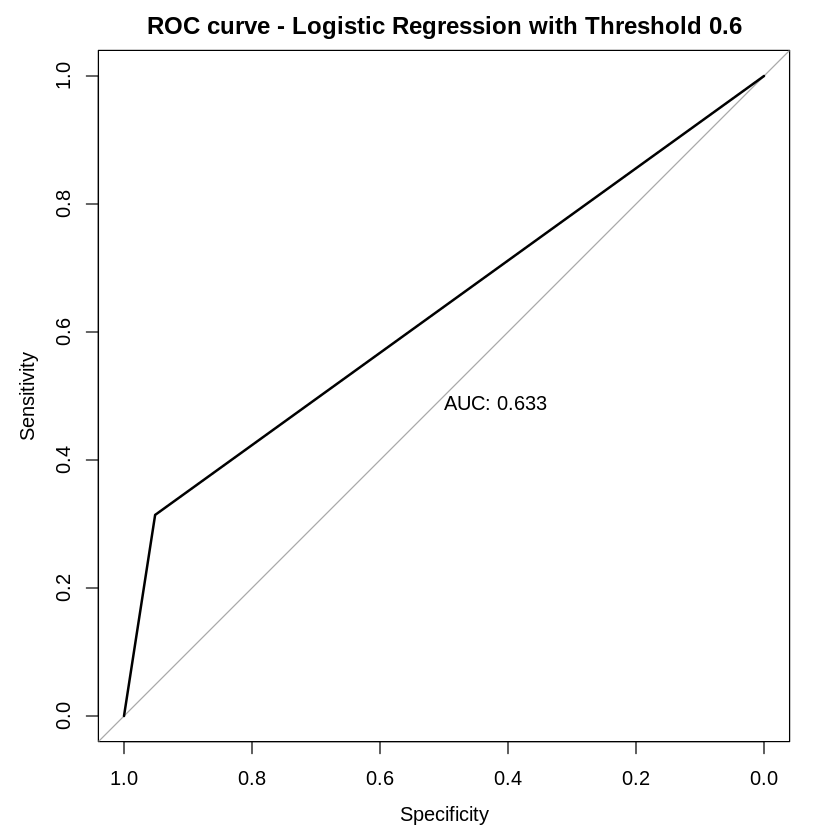

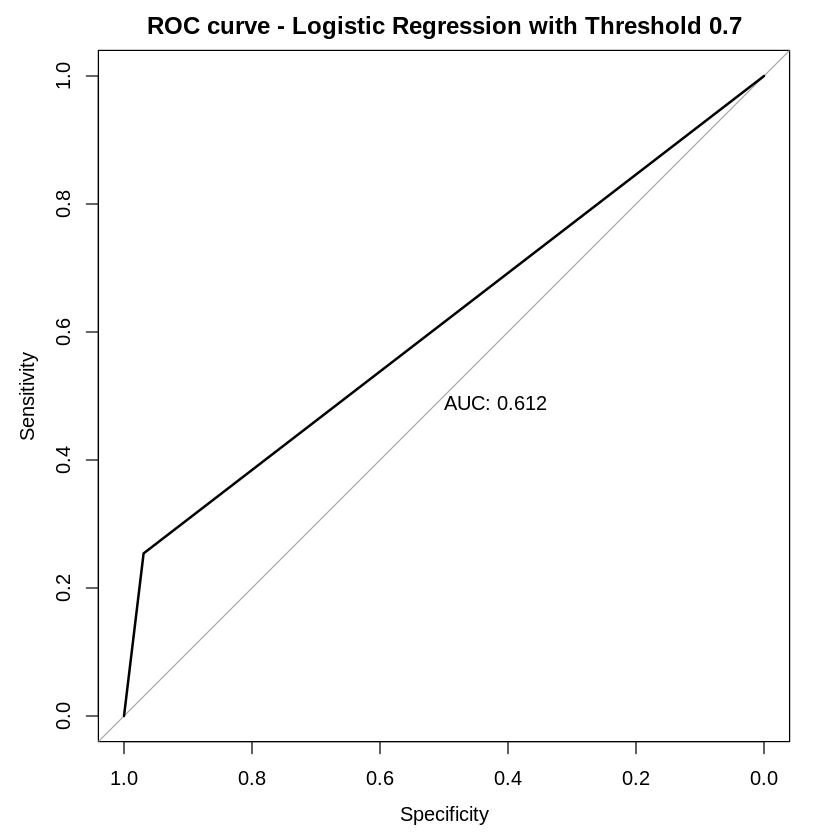

In [8]:
#install.packages("pROC")
library(pROC)

Predicted <- tran_class_0.3
Actual <- test_set$is_spam
table(Actual,Predicted)

roc_data=roc(Actual, Predicted, quiet=TRUE) 
plot(roc_data, print.auc=TRUE, main ="ROC curve - Logistic Regression with Threshold 0.3")

Predicted <- tran_class_0.4
Actual <- test_set$is_spam
table(Actual,Predicted)

roc_data=roc(Actual, Predicted, quiet=TRUE) 
plot(roc_data, print.auc=TRUE, main ="ROC curve - Logistic Regression with Threshold 0.4")


Predicted <- tran_class_0.5
Actual <- test_set$is_spam
table(Actual,Predicted)

roc_data=roc(Actual, Predicted, quiet=TRUE) 
plot(roc_data, print.auc=TRUE, main ="ROC curve - Logistic Regression with Threshold 0.5")

Predicted <- tran_class_0.6
Actual <- test_set$is_spam
table(Actual,Predicted)

roc_data=roc(Actual, Predicted, quiet=TRUE) 
plot(roc_data, print.auc=TRUE, main ="ROC curve - Logistic Regression with Threshold 0.6")

Predicted <- tran_class_0.7
Actual <- test_set$is_spam
table(Actual,Predicted)

roc_data=roc(Actual, Predicted, quiet=TRUE) 
plot(roc_data, print.auc=TRUE, main ="ROC curve - Logistic Regression with Threshold 0.7")

thresh,auc
<dbl>,<dbl>
0.3,0.7215699
0.4,0.7088835
0.5,0.7012332
0.6,0.6327795
0.7,0.6117339
0.8,0.5961822


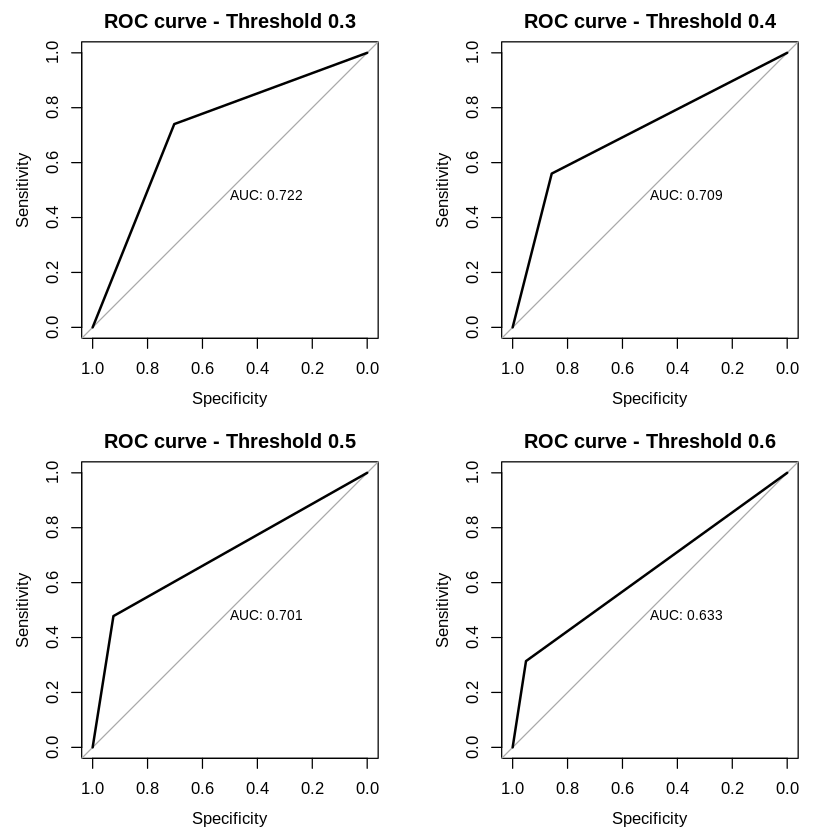

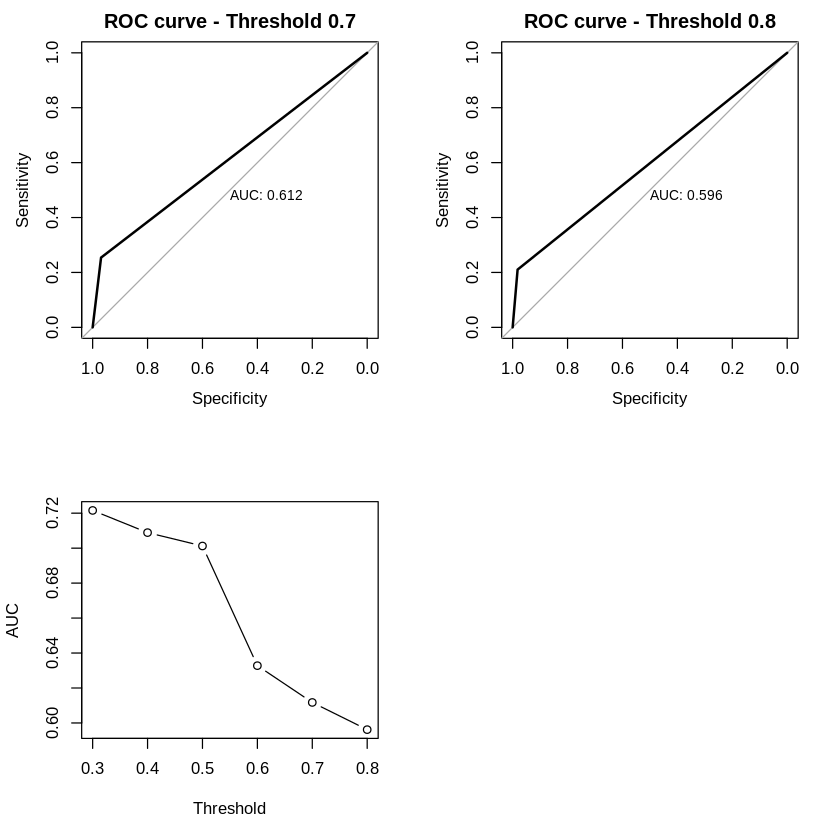

In [9]:
par(mfrow=c(2,2))

thresh <- c()
auc <- c()
for (i in 3:8) {
    t <- i/10
    Predicted <- as.integer(model2 > t)
    roc_data=roc(Actual, Predicted, quiet=TRUE) 
    plot(roc_data, print.auc=TRUE, main =paste("ROC curve - Threshold",t))
    thresh <- append(thresh,t)
    auc <- append(auc,roc_data$auc)
}

data.frame(thresh,auc)
plot(thresh,auc,xlab="Threshold",ylab="AUC",type="b")

##### 5a. Identify the Best Threshold

Based on your results above, which threshold is the most suitable for predicting classification? (Give your answer in this cell with a VERY brief justification.)

If I want to minimize false positives I would choose a higher threshold, such as 0.7 or 0.8. This will result in a lower false positive rate but may lead to more false negatives.

If I want to tolerate some false positives in exchange for identifying more spam emails, I would choose a lower threshold, such as 0.3 or 0.4. This will result in a higher false positive rate but may reduce false negatives.

For the sake of the most suitable, I will use 0.3

### Final Model Metrics

##### 6. Create a Confusion Matrix 

Using the threshold you selected above, create and display a confusion matrix for the classifications predicted with that threshold for the **_test_** data set.


In [10]:
Predicted <- tran_class_0.3
Actual <- test_set$is_spam
table(Actual,Predicted)

      Predicted
Actual   0   1
     0 390 165
     1  95 271

##### 7. Compute Model Metrics

Using the confusion matrix you created in Exercise 7, compute the following metrics.  Write your answers in this cell.

* Accuracy
    <br>Answer: 0.717698....
    
    
* Sensitivity
    <br>Answer: 0.740437...
    
    
* Specificity
    <br>Answer: 0.7027027...
    
    
* Precision
    <br>Answer: 0.62155963...
    
    

In [11]:
accuracy = (390 + 271)/(271+390+165+95)
accuracy

sensitivity = 271/(271+95)
sensitivity

specificity = 390/(390+165)
specificity

precision = 271/(271+165)
precision

[1] 0.7176982

[1] 0.7404372

[1] 0.7027027

[1] 0.6215596

In [12]:
#Put solution to Exercise 7 in this cell. You may add additional cells if you like.
Predicted <- tran_class_0.3
Actual <- test_set$is_spam
table(Actual,Predicted)

      Predicted
Actual   0   1
     0 390 165
     1  95 271

##### 8. Create a Calibration Plot

Using the **_test data set_**, create a calibration plot.

also installing the dependencies ‘RConics’, ‘mvtnorm’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



$calibration_plot

$data_summary
   decile    obsRate obsRate_SE obsNo  predRate obsRate_UCL obsRate_LCL
1       1 0.06451613 0.02561288    93 0.1868125   0.1147174  0.01431489
2       2 0.14130435 0.03651545    92 0.2217590   0.2128746  0.06973406
3       3 0.16304348 0.03872420    92 0.2410001   0.2389429  0.08714404
4       4 0.21739130 0.04323871    92 0.2627067   0.3021392  0.13264343
5       5 0.36956522 0.05059935    92 0.2823979   0.4687399  0.27039049
6       6 0.32608696 0.04914145    92 0.3089126   0.4224042  0.22976972
7       7 0.50000000 0.05241424    92 0.3723965   0.6027319  0.39726809
8       8 0.57608696 0.05180381    92 0.4749536   0.6776224  0.47455149
9       9 0.73913043 0.04603112    92 0.6318620   0.8293514  0.64890944
10     10 0.88043478 0.03401186    92 0.9318240   0.9470980  0.81377155


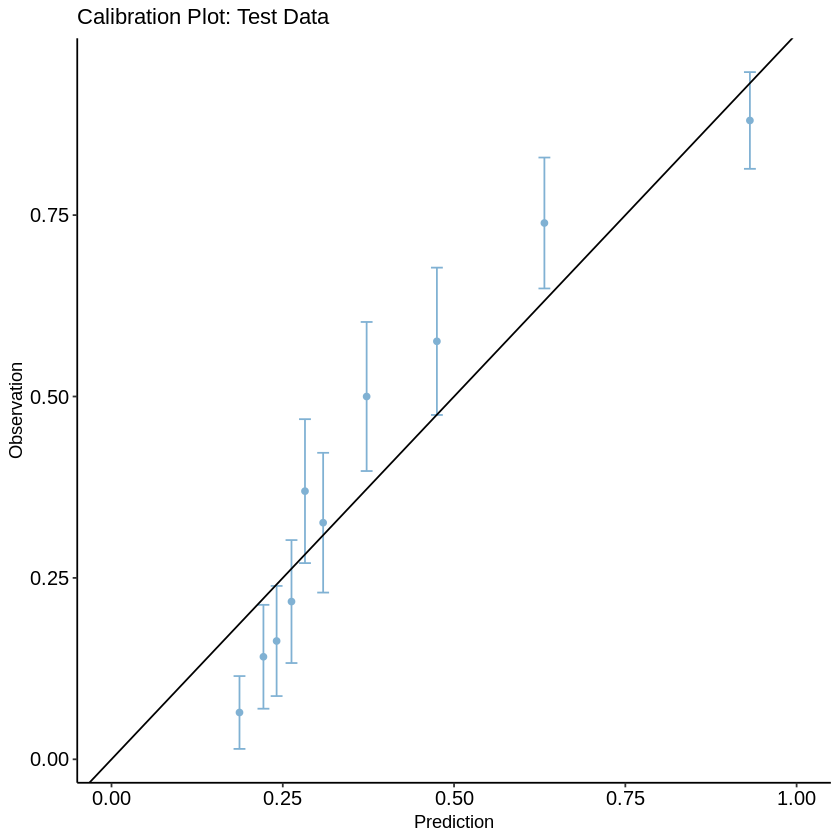

In [13]:
#Put solution to Exercise 8 in this cell. You may add additional cells if you like.
#install.packages("predtools")
library(predtools)

Probs <- model2
calibration <- data.frame(Actual,Probs)
calibration_plot(data = calibration, obs = "Actual", pred = "Probs", title = "Calibration Plot: Test Data", 
                 x_lim=c(0, 1), data_summary=TRUE)


##### 8a. Evaluate the Quality of Your Model

Type your answers in this cell.

1. Interpret the calibration plot. What does it tell you?

points above the line have higher actual proportion than predicted, and points below the line have lower actual proportion than predicted. All the points have a margin of error, and when it crosses the line then it means the data is highly variable, and the calibration may still be reasonable

2. Interpret the metrics you computed in Exercise 7. What do they tell you?

The accuracy measures the overall correctness of the model's prediction so in this case, it correctly classidies 71.8% of the data points. The sensitivity measures the ability of the model to correctly identify the positive cases which in this case is 74%. The specificity measures the ability of the model to correctly identify the negative cases with all the actual negative cases which is 70.3%. The precision measures how many of the predicted positive cases are correct. The precision is approcimately 62.1%

3. Based on both the metrics AND the calibration plot, what is your assessment of the model overall? Explain.

Sensitivity and specificity are both above 70% which is great for identifying both spam and nonspam emails. The accuracy could be improved by increasing the precision to reduce the number of false positives. the calibration plot shows that the model's predicted probabilities need recalibrated to align more closely with the observed rates.
